<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/lectures/machine_learning/over_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Overfitting I

## Introducción

**Overfitting y Underfitting en Machine Learning**

- **Overfitting**: Sucede cuando el modelo se ajusta demasiado a los datos de entrenamiento, capturando ruido y patrones específicos que no generalizan bien. Esto es común en modelos complejos y puede evitarse mediante validación cruzada para comparar rendimiento en datos de prueba.

- **Underfitting**: Ocurre cuando el modelo es demasiado simple y no capta patrones importantes, presentando bajo ajuste y alto sesgo.

**Escogiendo el Mejor Modelo**

La complejidad del modelo afecta el riesgo de sobreajuste. No hay una regla exacta, pero se pueden usar herramientas de validación para equilibrar ajuste y generalización.

<img src="https://scikit-learn.org/1.3/_images/sphx_glr_plot_underfitting_overfitting_001.png" width = "900" align="center"/>


### Ejemplo de Ajuste con Función Sinusoidal

Veamos un ejemplo simple en Python donde ajustaremos un modelo de **Árbol de Decisión (DT)** sobre una función sinusoidal.

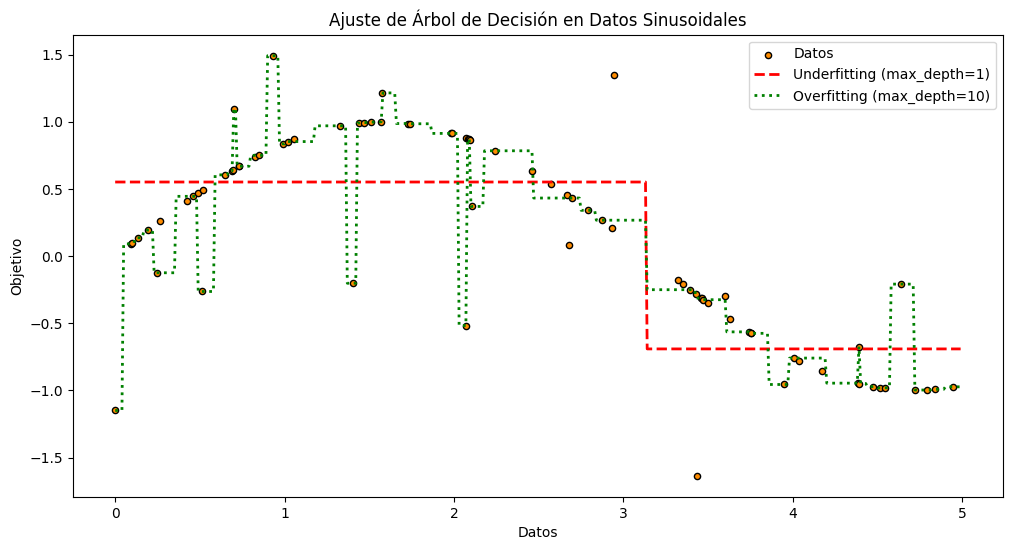

In [14]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import random

# Configuración de semilla y gráficos
random.seed(1982)
%matplotlib inline
sns.set_palette("deep", desat=0.6)
sns.set_context(rc={"figure.figsize": (12, 6)})

# Crear dataset sinusoidal con ruido
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))  # Añadir ruido

# Dividir los datos en entrenamiento y evaluación
x_train, x_eval, y_train, y_eval = train_test_split(X, y, test_size=0.35, random_state=1982)

# Definir modelos con distintos niveles de complejidad
regr_underfit = DecisionTreeRegressor(max_depth=1)   # Underfitting
regr_overfit = DecisionTreeRegressor(max_depth=10)   # Overfitting

# Entrenar los modelos
regr_underfit.fit(x_train, y_train)
regr_overfit.fit(x_train, y_train)

# Generar predicciones
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_underfit = regr_underfit.predict(X_test)
y_overfit = regr_overfit.predict(X_test)

# Visualización de resultados
fig, ax = plt.subplots(figsize=(12, 6))
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="Datos")
plt.plot(X_test, y_underfit, color="red", linestyle="--", label="Underfitting (max_depth=1)", linewidth=2)
plt.plot(X_test, y_overfit, color="green", linestyle=":", label="Overfitting (max_depth=10)", linewidth=2)

# Etiquetas y leyenda
plt.xlabel("Datos")
plt.ylabel("Objetivo")
plt.title("Ajuste de Árbol de Decisión en Datos Sinusoidales")
plt.legend()
plt.show()


In [17]:
# Crear un DataFrame para almacenar los resultados del modelo
results = pd.DataFrame({
    'Model': ['Decision Tree (Underfitting - max_depth=1)', 'Decision Tree (Overfitting - max_depth=10)'],
    'Train Score': [regr_underfit.score(x_train, y_train), regr_overfit.score(x_train, y_train)],
    'Test Score': [regr_underfit.score(x_eval, y_eval), regr_overfit.score(x_eval, y_eval)]
})

# Mostrar resultados
results

,Model,Train Score,Test Score
0,Decision Tree (Underfitting - max_depth=1),0.600781,0.741027
1,Decision Tree (Overfitting - max_depth=10),1.000000,0.661186


- **Underfitting (max_depth=1)**: La puntuación en entrenamiento es baja (0.600781), indicando que el modelo es demasiado simple y no captura bien los patrones. La puntuación en prueba es algo mejor (0.741027) pero sigue siendo baja, característico de un modelo que no se ajusta bien a los datos.

- **Overfitting (max_depth=10)**: La puntuación en entrenamiento es perfecta (1.000000), pero baja en prueba (0.661186), lo que sugiere que el modelo ajusta demasiado los datos de entrenamiento, capturando ruido y generalizando mal en nuevos datos.

**Conclusión**: Un modelo con profundidad intermedia podría mejorar el equilibrio entre ajuste y generalización.




### Equilibrio en el Ajuste de Modelos

Ahora utilizaremos un conjunto de datos generado con **make_classification** para ilustrar cómo ajustar la complejidad del modelo y alcanzar un equilibrio en el *ajuste*. Usando el ejemplo de los **Árboles de Decisión**, evaluaremos la precisión (*score*) para diferentes profundidades del árbol en los conjuntos de entrenamiento y prueba.

A continuación, el código:


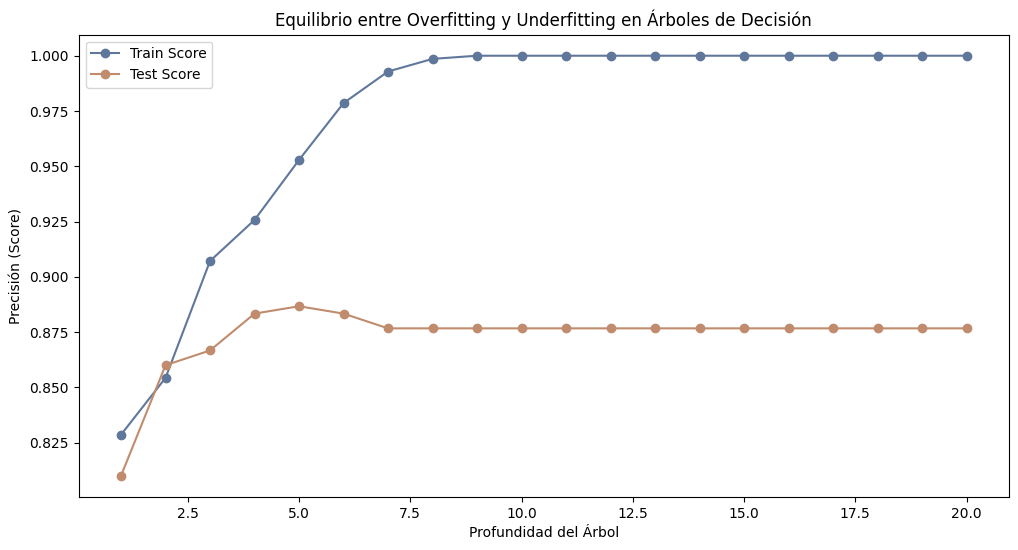

In [19]:
# Librerías
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Generar conjunto de datos
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=42)

# Dividir el conjunto de datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Evaluar modelos con diferentes profundidades
train_scores = []
test_scores = []
depths = range(1, 21)

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(x_train, y_train)
    train_scores.append(model.score(x_train, y_train))
    test_scores.append(model.score(x_test, y_test))

# Graficar resultados
plt.figure(figsize=(12, 6))
plt.plot(depths, train_scores, label='Train Score', marker='o')
plt.plot(depths, test_scores, label='Test Score', marker='o')
plt.xlabel("Profundidad del Árbol")
plt.ylabel("Precisión (Score)")
plt.title("Equilibrio entre Overfitting y Underfitting en Árboles de Decisión")
plt.legend()
plt.show()

In [20]:
# Resultados en DataFrame para referencia
results_df = pd.DataFrame({
    "Profundidad": depths,
    "Train Score": train_scores,
    "Test Score": test_scores
})
results_df


,Profundidad,Train Score,Test Score
0,1,0.828571,0.810000
1,2,0.854286,0.860000
2,3,0.907143,0.866667
3,4,0.925714,0.883333
4,5,0.952857,0.886667
5,6,0.978571,0.883333
6,7,0.992857,0.876667
7,8,0.998571,0.876667
8,9,1.000000,0.876667
9,10,1.000000,0.876667



### Explicación:
- **Generación de datos**: Se crea un conjunto de datos de clasificación con 10 características.
- **Evaluación de modelos**: Entrenamos árboles de decisión con profundidades de 1 a 20, registrando la precisión en los conjuntos de entrenamiento y prueba.
- **Visualización**: La gráfica muestra cómo la precisión varía con la profundidad del árbol, ilustrando el equilibrio entre *underfitting* y *overfitting*:
  - Profundidades bajas: *Underfitting*, con baja precisión en ambos conjuntos.
  - Profundidades intermedias: Buen equilibrio entre precisión en entrenamiento y prueba.
  - Profundidades altas: *Overfitting*, alta precisión en entrenamiento pero disminución en prueba.

La tabla `results_df` ofrece una referencia rápida para comparar las precisiones obtenidas.


Podemos crear un gráfico similar en Scikit-learn utilizando validation_curve para evaluar el rendimiento en distintas profundidades del modelo.

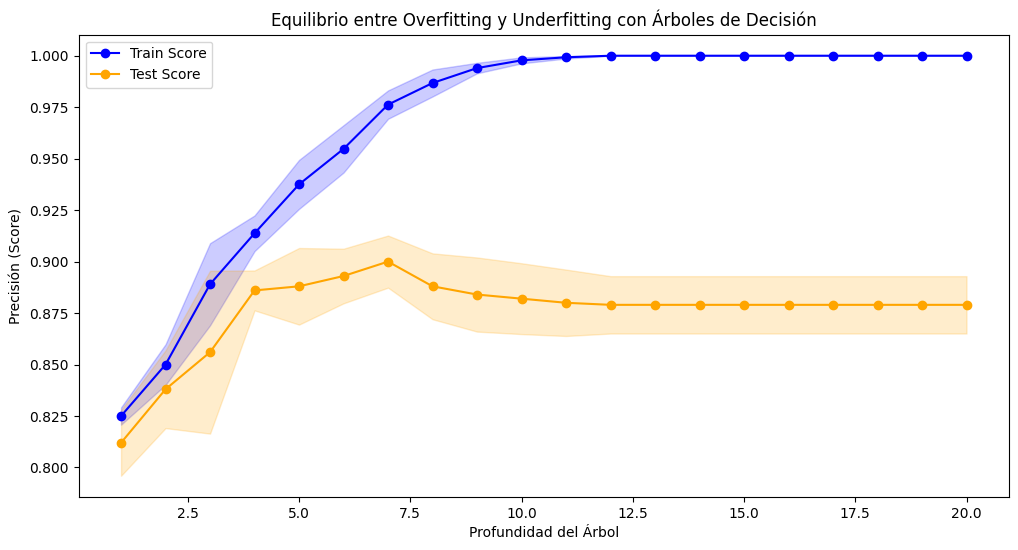

In [22]:
# Librerías
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, validation_curve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Generar conjunto de datos
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=42)

# Dividir el conjunto de datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Rango de profundidades a evaluar
param_range = np.arange(1, 21)

# Obtener scores de validación para distintas profundidades de árbol
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(random_state=42),
    X, y,
    param_name="max_depth",
    param_range=param_range,
    cv=5,  # Número de particiones para validación cruzada
    scoring="accuracy"
)

# Calcular promedio y desviación estándar de los scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar resultados
plt.figure(figsize=(12, 6))
plt.plot(param_range, train_scores_mean, label="Train Score", color="blue", marker='o')
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.plot(param_range, test_scores_mean, label="Test Score", color="orange", marker='o')
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="orange")

plt.xlabel("Profundidad del Árbol")
plt.ylabel("Precisión (Score)")
plt.title("Equilibrio entre Overfitting y Underfitting con Árboles de Decisión")
plt.legend()
plt.show()

In [ ]:
# Resultados en DataFrame para referencia
results_df = pd.DataFrame({
    "Profundidad": param_range,
    "Train Score Mean": train_scores_mean,
    "Test Score Mean": test_scores_mean
})
results_df


,Profundidad,Train Score Mean,Test Score Mean
0,1,0.82500,0.812
1,2,0.85000,0.838
2,3,0.88900,0.856
3,4,0.91375,0.886
4,5,0.93750,0.888
5,6,0.95475,0.893
6,7,0.97625,0.900
7,8,0.98675,0.888
8,9,0.99400,0.884
9,10,0.99775,0.882


## Referencias

1. [Underfitting vs Underfitting](https://scikit-learn.org/0.15/auto_examples/plot_underfitting_overfitting.html)
2. [Overfitting and Underfitting With Machine Learning Algorithms](https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/)
